<a href="https://colab.research.google.com/github/pszemraj/ml4hc-s22-project01/blob/start-ensemble/notebooks/colab/ensemble/Ensembles_MITBIH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> Basic Ensembling of Model Outputs </center>

<font color="orange"> - this one is for the MITBIH dataset </font>

In [1]:
#@title mount drive
from pathlib import Path
from google.colab import drive

drive_base_str = '/content/drive'
drive.mount(drive_base_str)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#@markdown add auto-Colab formatting with `IPython.display`
from IPython.display import HTML, display
# colab formatting
def set_css():
    display(
        HTML(
            """
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  """
        )
    )

get_ipython().events.register("pre_run_cell", set_css)

In [3]:
!pip install -U pandas -q
import pandas as pd

In [4]:
!python -m pip uninstall -y matplotlib
!pip install matplotlib==3.1.3 -q
import matplotlib.pyplot as plt

Found existing installation: matplotlib 3.5.1
Uninstalling matplotlib-3.5.1:
  Successfully uninstalled matplotlib-3.5.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.1.0 requires matplotlib>=3.2.0, but you have matplotlib 3.1.3 which is incompatible.
autoviz 0.1.36 requires matplotlib>=3.3.3, but you have matplotlib 3.1.3 which is incompatible.
arviz 0.11.4 requires typing-extensions<4,>=3.7.4.3, but you have typing-extensions 4.1.1 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [5]:
!pip install scikit-learn==0.23.2 -q
import sklearn

In [6]:
!pip install -U pycaret[full] -q

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
arviz 0.11.4 requires typing-extensions<4,>=3.7.4.3, but you have typing-extensions 4.1.1 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [7]:
!nvidia-smi

Mon Mar 28 05:01:36 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    23W / 300W |      0MiB / 16160MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# setup

In [8]:
#@markdown add auto-Colab formatting with `IPython.display`
from IPython.display import HTML, display
# colab formatting
def set_css():
    display(
        HTML(
            """
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  """
        )
    )

get_ipython().events.register("pre_run_cell", set_css)

In [9]:
#@markdown determine root
import os
from pathlib import Path
peter_base = Path('/content/drive/MyDrive/ETHZ-2022-S/ML-healthcare-projects/project1/')

if peter_base.exists() and peter_base.is_dir():
    path = str(peter_base.resolve())
else:
    # original
    path = '/content/drive/MyDrive/ETH/'

print(f"base drive dir is:\n{path}")

base drive dir is:
/content/drive/MyDrive/ETHZ-2022-S/ML-healthcare-projects/project1


## define folder for outputs

In [10]:
_out_dir_name = "Trained-Results-Analysis" #@param {type:"string"}

output_path = os.path.join(path, _out_dir_name)
os.makedirs(output_path, exist_ok=True)
print(f"notebook outputs will be stored in:\n{output_path}")

notebook outputs will be stored in:
/content/drive/MyDrive/ETHZ-2022-S/ML-healthcare-projects/project1/Trained-Results-Analysis


# test basic ensembling with PyCaret

- docs can be found [here](https://pycaret.gitbook.io/docs/get-started/tutorials)


In [11]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


## try mitbih first

In [12]:
import pandas as pd 

In [13]:
root_dir = Path(path)
# /content/drive/MyDrive/ETHZ-2022-S/ML-healthcare-projects/project1/Trained-Results-Analysis/mitbih_ensemble/mitbih_testset_model_predictions.csv
mitbih_result_path = root_dir / "Trained-Results-Analysis" / "MIT_ensemble" / "MITBIH_testset_model_predictions.csv"
mitbih_df = pd.read_csv(mitbih_result_path)

In [14]:
mitbih_outpath = Path(output_path) / "MIT_ensemble"


In [15]:
from pycaret.classification import *

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [16]:
from pycaret.classification import setup
mitbih_exp = setup(data = mitbih_df, target = 'actual_class', 
                session_id=123, use_gpu=True)
                

,Description,Value
0,session_id,123
1,Target,actual_class
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(21892, 14)"
5,Missing Values,False
6,Numeric Features,0
7,Categorical Features,13
8,Ordinal Features,False
9,High Cardinality Features,False


In [17]:
mitbih_best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
svm,SVM - Linear Kernel,0.9886,0.0000,0.9041,0.9884,0.9883,0.9617,0.9619,0.223
ridge,Ridge Classifier,0.9886,0.0000,0.9062,0.9885,0.9884,0.9620,0.9621,0.061
lda,Linear Discriminant Analysis,0.9886,0.9819,0.9083,0.9884,0.9883,0.9618,0.9619,0.201
lr,Logistic Regression,0.9885,0.9886,0.8967,0.9883,0.9881,0.9613,0.9616,2.275
rf,Random Forest Classifier,0.9879,0.9862,0.8980,0.9878,0.9876,0.9595,0.9597,1.475
catboost,CatBoost Classifier,0.9876,0.9878,0.8966,0.9874,0.9873,0.9584,0.9586,7.315
knn,K Neighbors Classifier,0.9875,0.9819,0.8904,0.9873,0.9870,0.9578,0.9581,2.714
et,Extra Trees Classifier,0.9875,0.9817,0.8932,0.9873,0.9872,0.9581,0.9583,1.460
lightgbm,Light Gradient Boosting Machine,0.9873,0.9850,0.8925,0.9870,0.9869,0.9573,0.9575,0.867
gbc,Gradient Boosting Classifier,0.9872,0.9878,0.8962,0.9870,0.9869,0.9572,0.9573,6.380


### logistic regression

In [18]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9922,0.9900,0.9198,0.9920,0.9919,0.9738,0.9739
1,0.9870,0.9783,0.8923,0.9867,0.9866,0.9562,0.9564
2,0.9876,0.9957,0.8928,0.9873,0.9874,0.9583,0.9585
3,0.9909,0.9916,0.9450,0.9911,0.9905,0.9694,0.9696
4,0.9876,0.9913,0.8701,0.9872,0.9870,0.9580,0.9583
5,0.9909,0.9865,0.9230,0.9909,0.9906,0.9691,0.9694
6,0.9850,0.9793,0.8593,0.9846,0.9842,0.9492,0.9495
7,0.9869,0.9934,0.8613,0.9865,0.9863,0.9565,0.9566
8,0.9850,0.9840,0.8749,0.9847,0.9845,0.9491,0.9496


In [19]:
tuned_lr = tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9915,0.9900,0.8998,0.9914,0.9911,0.9716,0.9717
1,0.9856,0.9783,0.8868,0.9854,0.9853,0.9519,0.9520
2,0.9883,0.9957,0.8945,0.9880,0.9880,0.9606,0.9608
3,0.9902,0.9916,0.9429,0.9902,0.9899,0.9672,0.9674
4,0.9876,0.9913,0.8701,0.9872,0.9870,0.9580,0.9583
5,0.9902,0.9866,0.9176,0.9903,0.9899,0.9669,0.9672
6,0.9843,0.9787,0.8592,0.9838,0.9835,0.9471,0.9474
7,0.9869,0.9931,0.8613,0.9865,0.9863,0.9565,0.9566
8,0.9850,0.9835,0.8749,0.9846,0.9845,0.9491,0.9496


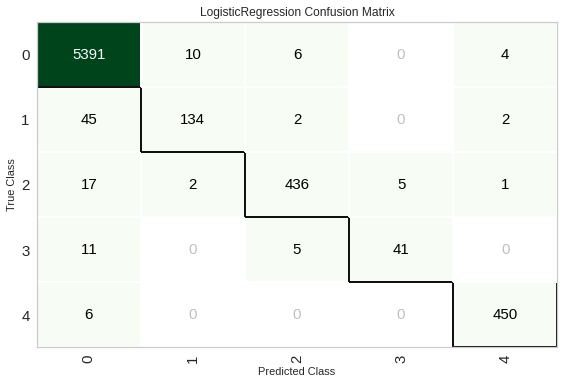

In [20]:
plot_model(tuned_lr, plot = 'confusion_matrix')

In [37]:
save_model(tuned_lr, model_name=mitbih_outpath/"ensemble_logistic_reg_mitbih")


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='actual_class',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric...
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
                  LogisticRegression(C=3.882, class_w

### lightgbm

In [21]:
lightgbm = create_model('lightgbm')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9902,0.9895,0.9209,0.9901,0.9901,0.9674,0.9675
1,0.9850,0.9785,0.8848,0.9845,0.9846,0.9497,0.9498
2,0.9870,0.9932,0.8891,0.9866,0.9867,0.9563,0.9564
3,0.9922,0.9918,0.9584,0.9926,0.9921,0.9739,0.9740
4,0.9869,0.9847,0.8572,0.9864,0.9863,0.9559,0.9562
5,0.9902,0.9862,0.8940,0.9900,0.9899,0.9671,0.9672
6,0.9837,0.9725,0.8643,0.9830,0.9831,0.9452,0.9453
7,0.9850,0.9888,0.8590,0.9846,0.9845,0.9501,0.9502
8,0.9837,0.9832,0.8675,0.9832,0.9830,0.9444,0.9451


In [22]:
tuned_lightgbm = tune_model(lightgbm)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9928,0.9900,0.9305,0.9927,0.9927,0.9761,0.9761
1,0.9863,0.9783,0.8921,0.9861,0.9860,0.9541,0.9542
2,0.9889,0.9957,0.9017,0.9887,0.9887,0.9630,0.9630
3,0.9922,0.9917,0.9520,0.9923,0.9919,0.9738,0.9739
4,0.9883,0.9912,0.8594,0.9878,0.9875,0.9602,0.9606
5,0.9902,0.9862,0.9229,0.9902,0.9900,0.9670,0.9672
6,0.9837,0.9795,0.8643,0.9830,0.9831,0.9452,0.9453
7,0.9869,0.9932,0.8613,0.9865,0.9863,0.9565,0.9566
8,0.9850,0.9836,0.8768,0.9849,0.9846,0.9492,0.9497


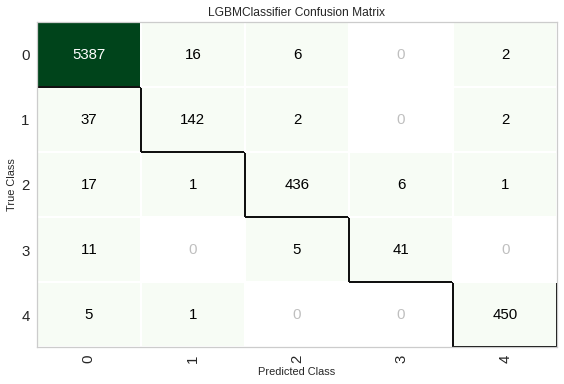

In [23]:
plot_model(tuned_lightgbm, plot = 'confusion_matrix')

In [24]:
evaluate_model(tuned_lightgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [36]:
save_model(tuned_lightgbm, model_name=mitbih_outpath/"ensemble_lgbm_mitbih")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='actual_class',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric...
                                 colsample_bytree=1.0, feature_fraction=0.5,
                                 importance_type='split', learning_rate=0.1,
                                 max_depth=-1, min_child_samples=66,
            

### xgboost

In [26]:
xgboost = create_model('xgboost')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9902,0.9901,0.9175,0.9900,0.9900,0.9674,0.9675
1,0.9843,0.9786,0.8847,0.9839,0.9840,0.9475,0.9476
2,0.9863,0.9949,0.8889,0.9860,0.9861,0.9542,0.9543
3,0.9909,0.9917,0.9563,0.9912,0.9908,0.9696,0.9696
4,0.9869,0.9879,0.8752,0.9864,0.9865,0.9560,0.9562
5,0.9915,0.9866,0.9303,0.9915,0.9914,0.9715,0.9716
6,0.9837,0.9779,0.8695,0.9831,0.9832,0.9454,0.9454
7,0.9850,0.9924,0.8590,0.9847,0.9845,0.9501,0.9502
8,0.9843,0.9839,0.8695,0.9839,0.9837,0.9468,0.9474


In [27]:
tuned_xg = tune_model(xgboost)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9915,0.9900,0.9249,0.9914,0.9913,0.9718,0.9718
1,0.9850,0.9781,0.8848,0.9847,0.9846,0.9496,0.9498
2,0.9876,0.9956,0.9046,0.9875,0.9875,0.9588,0.9589
3,0.9935,0.9915,0.9625,0.9936,0.9933,0.9783,0.9783
4,0.9883,0.9915,0.8756,0.9879,0.9877,0.9603,0.9606
5,0.9922,0.9861,0.9177,0.9922,0.9919,0.9737,0.9738
6,0.9837,0.9796,0.8643,0.9830,0.9831,0.9452,0.9453
7,0.9869,0.9962,0.8665,0.9867,0.9864,0.9566,0.9567
8,0.9856,0.9840,0.8837,0.9854,0.9853,0.9514,0.9518


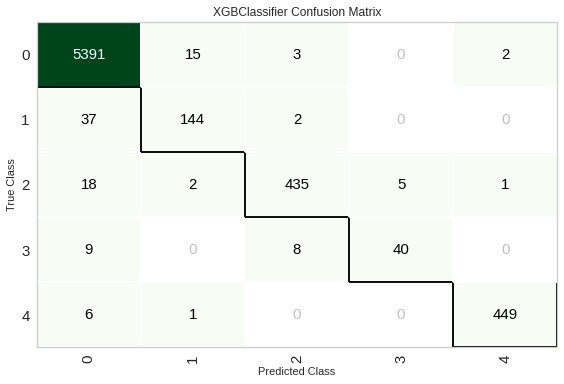

In [28]:
plot_model(tuned_xg, plot = 'confusion_matrix')

In [29]:
evaluate_model(tuned_xg)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [38]:
save_model(tuned_xg, model_name=mitbih_outpath/"ensemble_XGboost_mitbih")


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='actual_class',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric...
                                max_delta_step=0, max_depth=7,
                                min_child_weight=3, missing=nan,
                                monotone_constraints='()', n_estimators=290,
                              

# lazypredict

- docs are on [pypip here](https://pypi.org/project/lazypredict/)


In [30]:
!pip install lazypredict -q


     |████████████████████████████████| 6.8 MB 14.0 MB/s 
     |████████████████████████████████| 248 kB 64.9 MB/s 
     |████████████████████████████████| 269 kB 63.7 MB/s 
     |████████████████████████████████| 127.6 MB 29 kB/s 
     |████████████████████████████████| 10.1 MB 52.0 MB/s 
     |████████████████████████████████| 14.5 MB 63.8 MB/s 
     |████████████████████████████████| 1.2 MB 58.9 MB/s 
     |████████████████████████████████| 72 kB 922 kB/s 
     |████████████████████████████████| 302 kB 72.8 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0 requires tf-estimator-nightly==2.8.0.dev2021122109, which is not installed.
tensorflow 2.8.0 requires numpy>=1.20, but you have numpy 1.19.1 which is incompatible.
pycaret 2.3.9 requires scikit-learn==0.23.2, but you have scikit-learn 0.23.1 which is incompatible.
pandas-profiling 3.1.

In [31]:
lf_mitbih_df = mitbih_df.copy()
y = lf_mitbih_df.actual_class.values
del lf_mitbih_df["actual_class"]
X = lf_mitbih_df.values
print(X.shape, y.shape)

(21892, 13) (21892,)


In [32]:
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.5,random_state =123)

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)


100%|██████████| 29/29 [00:55<00:00,  1.91s/it]


In [34]:
import pprint as pp
# pp.pprint(models)

m_df = pd.DataFrame(models).convert_dtypes()
# m_df.to_csv(mitbih_outpath / "lazypredict_mitbih.csv")
m_df

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RandomForestClassifier,0.98,0.89,None,0.98,0.57
BaggingClassifier,0.98,0.89,None,0.98,0.14
ExtraTreesClassifier,0.98,0.88,None,0.98,1.18
XGBClassifier,0.98,0.88,None,0.98,3.08
DecisionTreeClassifier,0.98,0.88,None,0.98,0.10
LGBMClassifier,0.98,0.88,None,0.98,0.91
SVC,0.98,0.87,None,0.98,0.56
ExtraTreeClassifier,0.98,0.87,None,0.98,0.07
LinearDiscriminantAnalysis,0.98,0.86,None,0.98,0.10


In [35]:
import joblib

_out_lp_mitbih = Path(mitbih_outpath) / "LP_mitbih_ensemble_baselines_pandas.pkl"
joblib.dump(m_df, filename=_out_lp_mitbih, compress=True)

['/content/drive/MyDrive/ETHZ-2022-S/ML-healthcare-projects/project1/Trained-Results-Analysis/MIT_ensemble/LP_mitbih_ensemble_baselines_pandas.pkl']